In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def plot_image(image, title="Image"):
    if isinstance(image, bytes):
        image = np.frombuffer(image, np.uint8)
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)

    if len(image.shape) == 3 and image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(8, 8))
    plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [1]:
img_folder = "/home/nhat82125/ForgeryX-Server/example"
img_name = "im1_edit3"

tp_img = cv2.imread(os.path.join(img_folder, f"{img_name}.jpg"))
gt_img = cv2.imread(os.path.join(img_folder, f"{img_name}.png"))

plot_image(tp_img, "Tampered Image")
plot_image(gt_img, "Ground Truth Image")

NameError: name 'cv2' is not defined

In [ ]:
from bctmtx import bctmtx

BLOCK_SIZE = 8
OFFSET = 128

def extract_y_dct(image):
    if image.ndim == 3 and image.shape[2] == 3:
        byte_im_in = np.moveaxis(image, -1, 0)
    else:
        raise ValueError("Input image must be a color image with 3 channels.")

    height, width = byte_im_in.shape[1], byte_im_in.shape[2]
    height, width = (height // BLOCK_SIZE) * \
        BLOCK_SIZE, (width // BLOCK_SIZE) * BLOCK_SIZE

    y = np.round(0.299 * byte_im_in[0, :height, :width] +
                 0.587 * byte_im_in[1, :height, :width] +
                 0.114 * byte_im_in[2, :height, :width] - OFFSET)

    vec = im2vec(y, BLOCK_SIZE)
    mult = bctmtx @ vec
    return vec2im(mult, BLOCK_SIZE, height, width)


def im2vec(im_in, block_size):
    num_blk_x, num_blk_y = im_in.shape[0] // block_size, im_in.shape[1] // block_size
    return im_in.reshape(num_blk_x, block_size, num_blk_y, block_size).swapaxes(1, 2).reshape(block_size * block_size, -1)


def vec2im(vec_in, block_size, height, width):
    num_blk_x, num_blk_y = width // block_size, height // block_size
    im = vec_in.reshape(num_blk_y, num_blk_x, block_size, block_size).swapaxes(
        1, 2).reshape(width, height).astype(int)
    return im

In [ ]:
tp_img = cv2.cvtColor(tp_img, cv2.COLOR_BGR2RGB)
dct_coeff = extract_y_dct(tp_img)

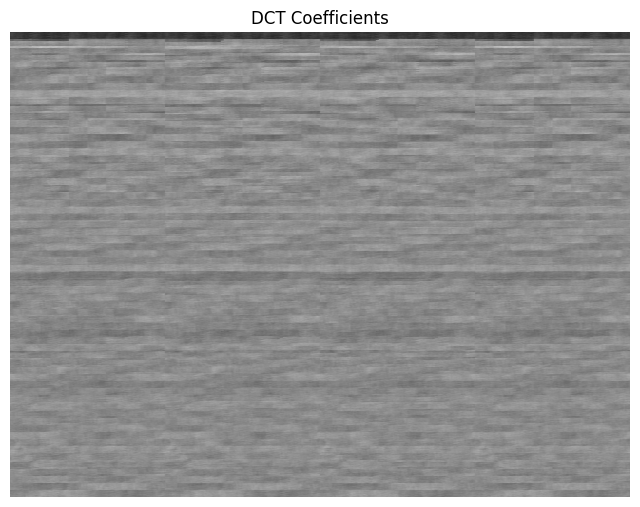

In [ ]:
plot_image(dct_coeff, "DCT Coefficients")